<a href="https://colab.research.google.com/github/royg-9595/Emotion_Detection/blob/main/Expression_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone form Git**

In [ ]:
!git clone https://github.com/misbah4064/facial_expressions.git

**Creating dirs**

In [2]:
%cd facial_expressions/
%mkdir -p data_set/{anger,happy,neutral,sad,surprise}

/content/facial_expressions


**Extracting Images with expressions**

In [7]:
import cv2
with open('neutral.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/neutral/"+image,loadedImage)
print("done writing")

done writing


In [8]:
%mkdir dataset

# **Step 1 : Creating Data Set of Faces**

In [13]:
import cv2

with open('anger.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("data_set/anger/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data")
#names = ['Happy', 'Surprised', 'Neutral', 'Sad', 'Anger', 'None']


 Enter Emotion id end press <return> ==>  4

 Done creating face data


In [15]:
%mkdir trainer

# **Step 2: Training Images**

In [16]:
import cv2
import numpy as np
from PIL import Image
import os

path = 'dataset'

recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') 
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces....")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

recognizer.write('trainer/trainer.yml') 

print("\n [INFO] {0} Emotions trained. Exiting Program".format(len(np.unique(ids))))



 [INFO] Training faces....

 [INFO] 5 Emotions trained. Exiting Program


# **Step 3 : Recognition (Testing)**

In [70]:
import cv2
import numpy as np
import os 

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

id = 0

names = ['Sad', 'Happy', 'Neutral', 'Sad', 'Anger', 'None'] 

cam = cv2.VideoCapture(0)
cam.set(3, 640) 
cam.set(4, 480) 

minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

# ret, img =cam.read()
img = cv2.imread("Sad.jpg")
# img = cv2.flip(img, -1) # Flip vertically

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale( 
    gray,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (int(minW), int(minH)),
    )

for(x,y,w,h) in faces:

    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

    # Check if confidence is less them 100 ==> "0" is perfect match 
    if (confidence < 100):
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence))
    else:
        id = "unknown"
        confidence = "  {0}%".format(round(100 - confidence))
    
    cv2.putText(img, str(id), (x+5,y-5), font, 5, (255,255,255), 2)
    cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)  

cv2.imwrite("Sample.jpg",img) 

print("\n [INFO] Done detecting and Image is saved")
cam.release()
cv2.destroyAllWindows()


 [INFO] Done detecting and Image is saved


# **Display Detected Images**

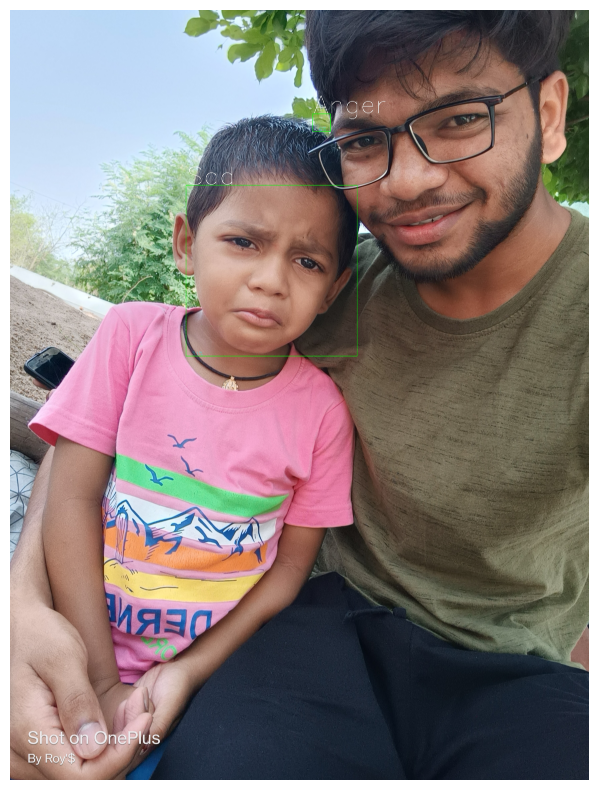

In [71]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("Sample.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()